# WasteWatch Dataset Creation

# Dataset Overview
In this project, the dataset was meticulously curated by the creator through a combination of manual collection and web scraping techniques. The primary sources for gathering images were Google Images and dreamstime.com. These platforms provided a diverse range of visuals representing various waste categories, contributing to the comprehensive nature of the dataset.

# Data Collection Process
The data collection process involved:

Manual Collection: The creator manually selected and downloaded images from Google Images and dreamstime.com. This hands-on approach ensured a careful curation of images representing different waste materials, fostering diversity within the dataset.

Web Scraping: Leveraging web scraping techniques, the creator extracted additional images to enrich the dataset. This automated approach allowed for a more extensive collection, covering a wide spectrum of waste items.

Filtering and Quality Control
To ensure the dataset's quality and relevance, a rigorous filtering process was implemented. This involved:

Category Definition: The waste materials were categorized into distinct classes, such as e-waste, batteries, glass, metal, organic, and paper.

Image Relevance: Only images directly relevant to the predefined waste categories were retained, excluding any irrelevant or ambiguous visuals.

# Dataset Storage
Upon completion of the collection and filtering process, the dataset was uploaded to [Google Drive](https://drive.google.com/drive/folders/1CTvT_gnTvwlcKwJ8yz4jUOs0JYTKrplA). This cloud-based storage solution facilitates easy access, sharing, and utilization of the dataset for machine learning or other analytical purposes.



In [1]:
# Import necessary libraries
import cv2
import itertools
import math
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow

# Accessing Google Drive in Colab

To access files from your Google Drive within this Colab notebook, follow these steps:

1. Import the 'drive' module from the 'google.colab' library.
2. Mount Google Drive to the Colab environment.
   - This step will prompt you to authenticate and authorize the Colab notebook to access your Google Drive.
   - Click on the link generated, which will open a new tab.
   - Sign in with your Google account if not already signed in.
   - Copy the authorization code provided.
   - Return to this notebook, paste the code in the input box, and press 'Enter'.

After completing these steps, your Google Drive will be mounted, and you can access your Drive files directly within this Colab notebook.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "/content/drive/MyDrive/WasteWatchData"

In [ ]:
def preprocess_image(img):
    """
    Preprocess an input image.

    Parameters:
    - img: Input image as a NumPy array.

    Returns:
    - Preprocessed image as a NumPy array.

    Steps:
    1. Convert the input image to a PIL Image.
    2. Normalize pixel values to the range [0, 1].
    3. Resize the image to the target size (128x128) using linear interpolation.

    Note: Make sure the 'PIL' and 'cv2' modules are imported before using this function.

    Example usage:
    img = cv2.imread("path/to/your/image.jpg")
    preprocessed_img = preprocess_image(img)
    """
    # Convert the input image to a PIL Image
    im = Image.fromarray(img)

    # Normalize pixel values to the range [0, 1]
    im = np.array(im) / 255.0

    # Resize the image to the target size (128x128) using linear interpolation
    img = cv2.resize(im, (128, 128), interpolation=cv2.INTER_LINEAR)

    return img


## Data

In [ ]:
def make_labels(label):
    """
    Convert a string label to a numerical label.

    Parameters:
    - label: Input label as a string.

    Returns:
    - Numerical label corresponding to the input string label.

    Mapping:
    - "e-waste"     --> 0
    - "batteries"   --> 1
    - "glass"       --> 2
    - "metal"       --> 3
    - "organic"     --> 4
    - "paper"       --> 5

    Note: Adjust the mapping based on the actual labels in your dataset.

    Example usage:
    label_num = make_labels("glass")
    """
    if label == "e-waste":
        return 0
    elif label == "batteries":
        return 1
    elif label == "glass":
        return 2
    elif label == "metal":
        return 3
    elif label == "organic":
        return 4
    elif label == "paper":
        return 5

In [ ]:
def create_simple_image_set(url):
    """
    Create a simple image dataset from a directory.

    Parameters:
    - url: Path to the directory containing subdirectories with images.

    Returns:
    - Pandas DataFrame with columns 'label' and 'img' representing the image dataset.

    Steps:
    1. Initialize an empty dictionary to store labels and images.
    2. Iterate over subdirectories in the specified directory.
    3. Extract the label using the 'make_labels' function.
    4. Iterate over images in each subdirectory.
    5. Read and preprocess each image using 'cv2' and 'preprocess_image'.
    6. Append the image and label to the dictionary.
    7. Create a Pandas DataFrame from the dictionary and return it.

    Note: Adjust the function based on the actual structure of your image dataset.

    Example usage:
    dataset_df = create_simple_image_set("/path/to/your/dataset")
    """
    # Initialize an empty dictionary to store labels and images
    new_df = {'label': [], 'img': []}

    # Iterate over subdirectories in the specified directory
    for folder in os.listdir(url):
        mainPath = os.path.join(url, folder)

        # Extract the label using the 'make_labels' function
        label = make_labels(folder)

        # Iterate over images in each subdirectory
        for img_name in os.listdir(mainPath):
            path = os.path.join(mainPath, img_name)
            img = cv2.imread(path)

            # Check if the image is None (i.e., not loaded properly)
            if img is None:
                print("Image is None. Skipping.")
                continue

            # Read and preprocess each image using 'cv2' and 'preprocess_image'
            im = preprocess_image(img)

            # Append the image and label to the dictionary
            new_df['img'].append(im)
            new_df['label'].append(label)

    # Create a Pandas DataFrame from the dictionary and return it
    return pd.DataFrame(data=new_df)


In [ ]:
# Call the create_simple_image_set function with the path to the directory
data = create_simple_image_set("/content/drive/MyDrive/images")

In [ ]:
from sklearn.model_selection import train_test_split

# Checking for NaNs in the dataset
print('Checking for NaNs')
print(data.isnull().any())

# Extract labels and images from the dataset
y_train1 = np.asanyarray(list(data["label"]))
x_train1 = np.asanyarray(list(data['img']))

# Display the shape of the labels array
print(y_train1.shape)

# Split the data into training (80%) and testing (20%) sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train1, y_train1, test_size=0.2, random_state=42)

Checking for NaNs
label     True
img      False
dtype: bool
(8085,)


In [ ]:
print(f"x_train shape:{x_train2.shape} - y_train shape: {y_train2.shape}")
print(f"x_test shape: {x_test2.shape} - y_test shape: {y_test2.shape}")

x_train shape:(6468, 128, 128, 3) - y_train shape: (6468,)
x_test shape: (1617, 128, 128, 3) - y_test shape: (1617,)


In [ ]:
# Extract labels from the test set
data2 = y_test2

# Check for NaN values in the labels
nan_mask = np.isnan(data2)
num_nan_values = np.sum(nan_mask)

# Print the number of NaN values in the labels
print(f"Number of null values: {num_nan_values}")

In [ ]:
def clean_data(x, y):
    """
    Clean the dataset by removing samples with NaN labels.

    Parameters:
    - x: Input features as a NumPy array.
    - y: Labels as a NumPy array.

    Returns:
    - Cleaned features and labels without NaN values.

    Steps:
    1. Identify NaN indices in the labels.
    2. Use the indices to remove samples with NaN labels.
    3. Print the shapes of the cleaned features and labels.
    4. Return the cleaned features and labels.

    Example usage:
    x_train, y_train = clean_data(x_train2, y_train2)
    x_test, y_test = clean_data(x_test2, y_test2)
    """
    # Identify NaN indices in the labels
    nan_indices = np.isnan(y)

    # Remove samples with NaN labels
    clean_y = y[~nan_indices]
    clean_x = x[~nan_indices]

    # Print the shapes of the cleaned features and labels
    print("Shape of clean x:", clean_x.shape)
    print("Shape of clean labels:", clean_y.shape)

    # Return the cleaned features and labels
    return clean_x, clean_y

# Apply the clean_data function to training and testing sets
x_train, y_train = clean_data(x_train2, y_train2)
x_test, y_test = clean_data(x_test2, y_test2)

Shape of clean x: (4580, 128, 128, 3)
Shape of clean labels: (4580,)
Shape of clean x: (1128, 128, 128, 3)
Shape of clean labels: (1128,)


In [ ]:
def make_labels(numbers):
    """
    Convert numerical labels to one-hot encoded labels.

    Parameters:
    - numbers: Numerical labels as a NumPy array.

    Returns:
    - One-hot encoded labels as a NumPy array.

    Steps:
    1. Determine the number of categories (assumed to be 6 in this case).
    2. Create an array of zeros with the shape (number of samples, number of categories).
    3. Iterate over the input numerical labels and set the corresponding element to 1 in the one-hot encoded array.
    4. Return the one-hot encoded labels.

    Example usage:
    Y_train = make_labels(y_train)
    Y_test = make_labels(y_test)
    """
    # Determine the number of categories (assumed to be 6 in this case)
    num_categories = 6

    # Create an array of zeros with the shape (number of samples, number of categories)
    one_hot_labels = np.zeros((len(numbers), num_categories), dtype=int)

    # Iterate over the input numerical labels and set the corresponding element to 1
    for i, number in enumerate(numbers):
        one_hot_labels[int(i), int(number)] = 1

    # Return the one-hot encoded labels
    return one_hot_labels

# Apply the make_labels function to training and testing labels
Y_train = make_labels(y_train)
Y_test = make_labels(y_test)


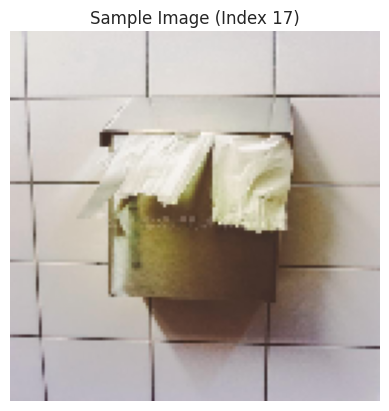

Shape of the first image: (128, 128, 3)


In [ ]:
import matplotlib.pyplot as plt

# Assuming x_train2 is a collection of images

# Display the 17th image
plt.imshow(x_train[17])
plt.title("Sample Image (Index 17)")
plt.axis("off")  # Turn off axis labels
plt.show()

# Print the shape of the 1st image
print("Shape of the first image:", x_train[1].shape)


In [ ]:
# Save the training and testing data to NumPy files

# Save the training features (images) to a NumPy file
np.save("/content/drive/MyDrive/WasteWatchData/mlData/x_train11.npy", x_train)

# Save the one-hot encoded training labels to a NumPy file
np.save("/content/drive/MyDrive/WasteWatchData/mlData/y_train1.npy", Y_train)

# Save the testing features (images) to a NumPy file
np.save("/content/drive/MyDrive/WasteWatchData/mlData/x_test1.npy", x_test)

# Save the one-hot encoded testing labels to a NumPy file
np.save("/content/drive/MyDrive/WasteWatchData/mlData/y_test1.npy", Y_test)


Data Analysis

In [3]:
x_train = np.load("/content/drive/MyDrive/WasteWatchData/mlData/x_train11.npy")
Y_train = np.load("/content/drive/MyDrive/WasteWatchData/mlData/y_train1.npy")
x_test = np.load("/content/drive/MyDrive/WasteWatchData/mlData/x_test1.npy")
Y_test = np.load("/content/drive/MyDrive/WasteWatchData/mlData/y_test1.npy")

In [9]:

# Display basic information about the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Convert one-hot encoded labels to class labels
train_labels = np.argmax(Y_train, axis=1)
test_labels = np.argmax(Y_test, axis=1)

# Display class distribution
train_class_distribution = pd.Series(train_labels).value_counts().sort_index()
test_class_distribution = pd.Series(test_labels).value_counts().sort_index()

print("\nClass Distribution (Training Data):")
print(train_class_distribution)

print("\nClass Distribution (Testing Data):")
print(test_class_distribution)

Training data shape: (4580, 128, 128, 3)
Testing data shape: (1128, 128, 128, 3)

Class Distribution (Training Data):
0     494
1     909
2     583
3     887
4     531
5    1176
dtype: int64

Class Distribution (Testing Data):
0    130
1    213
2    148
3    205
4    140
5    292
dtype: int64


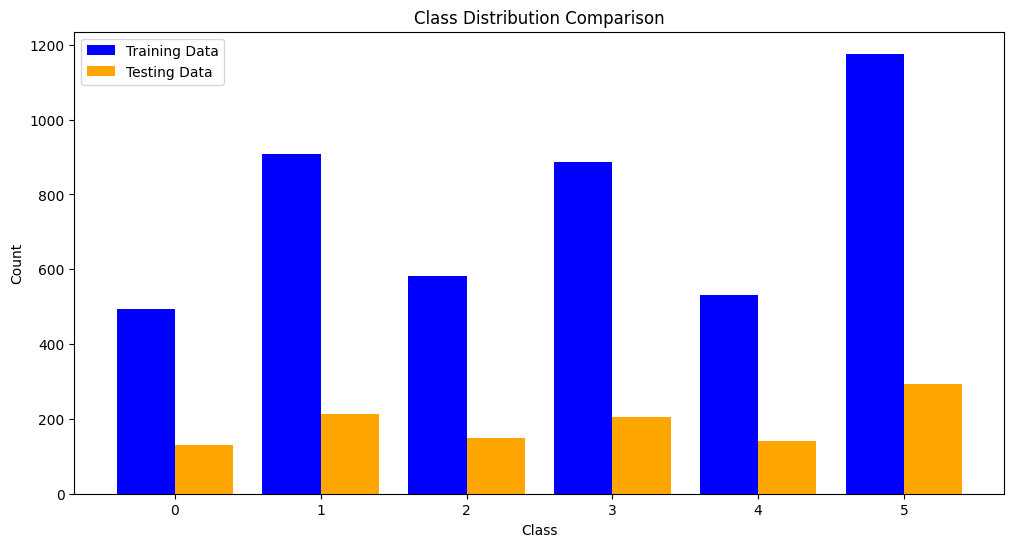

In [10]:

# Convert one-hot encoded labels to class labels
train_labels = np.argmax(Y_train, axis=1)
test_labels = np.argmax(Y_test, axis=1)

# Display class distribution statistics
train_class_distribution = pd.Series(train_labels).value_counts().sort_index()
test_class_distribution = pd.Series(test_labels).value_counts().sort_index()

# Visualize class distribution for both training and testing data
plt.figure(figsize=(12, 6))

plt.bar(train_class_distribution.index - 0.2, train_class_distribution.values, color='blue', width=0.4, label='Training Data')
plt.bar(test_class_distribution.index + 0.2, test_class_distribution.values, color='orange', width=0.4, label='Testing Data')

plt.title('Class Distribution Comparison')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()

plt.show()


Number of training images: 4580
Image shape: (128, 128, 3)

Image Statistics:
Mean: 0.5904733110759075
Standard Deviation: 0.2920202350834762


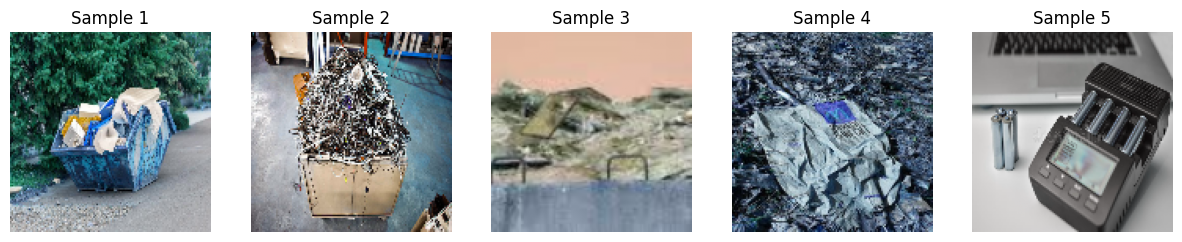

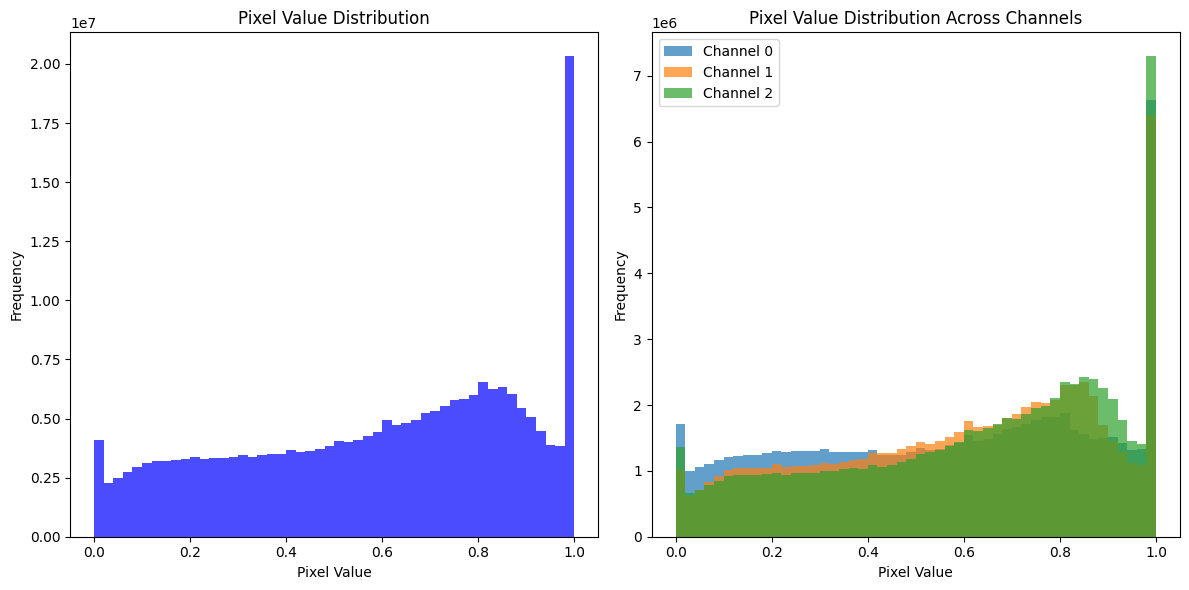

In [7]:
# Display basic information about the images
print("Number of training images:", x_train.shape[0])
print("Image shape:", x_train.shape[1:])

# Compute and display image statistics
image_mean = np.mean(x_train)
image_std = np.std(x_train)

print("\nImage Statistics:")
print("Mean:", image_mean)
print("Standard Deviation:", image_std)

# Visualize sample images
num_samples = 5
sample_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, index in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[index])
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.show()

# Explore pixel value distribution
flatten_images = x_train.flatten()

plt.figure(figsize=(12, 6))

# Histogram of pixel values
plt.subplot(1, 2, 1)
plt.hist(flatten_images, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Histograms for each color channel
plt.subplot(1, 2, 2)
for i in range(x_train.shape[-1]):
    plt.hist(x_train[:, :, :, i].flatten(), bins=50, alpha=0.7, label=f'Channel {i}')

plt.title('Pixel Value Distribution Across Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()